In [1]:
import numpy as np
import pandas as pd
import torch

import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
from torch.utils.data import DataLoader
from poc_data import PocDataset, display_sample


NUM_CASES = 2**10

poc_raw_dataset = PocDataset(num_cases=NUM_CASES, generate_meta=True, test_set=False, repays=True)
data_loader = DataLoader(dataset=poc_raw_dataset,
                        batch_size=NUM_CASES,
                        shuffle=False,
                        pin_memory=True)

all_data, all_data_length, all_event, all_meta = next(iter(data_loader))

In [14]:
event_occurences = torch.bincount(all_event.flatten())
length_occurences = torch.bincount(all_data_length.flatten())

print(event_occurences)
print(length_occurences)

tensor([214, 191, 330, 289])
tensor([  0,   0,   0,   0,   0, 139,  55,  53,  42,  34,  35,  27,  32,  34,
         32,  24,  32,  33,  17,  16,  30,  18,  19,  22, 330])


In [15]:
print(all_meta['age'].shape)

torch.Size([1024])


In [16]:
print(all_data[0])
print(all_meta['age'][0])
print(all_meta['ground_truth_event'][0])


tensor([[  0.0000,  24.0000,  23.0000,  28.9913,  54.8907],
        [  1.0000,  24.0000,  22.0000,  55.2358, -13.4269],
        [  2.0000,  24.0000,  21.0000,  30.6968, -69.3999],
        [  3.0000,  24.0000,  20.0000, -22.0647, -61.5669],
        [  4.0000,  24.0000,  19.0000, -54.5400,   2.8704],
        [  5.0000,  24.0000,  18.0000, -36.8715,  64.6687],
        [  6.0000,  24.0000,  17.0000,  14.6965,  67.0109],
        [  7.0000,  24.0000,  16.0000,  52.7526,   7.7436],
        [  8.0000,  24.0000,  15.0000,  42.3082, -58.6431],
        [  9.0000,  24.0000,  14.0000,  -7.0342, -71.1136],
        [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,  

In [5]:
for i in range(10):
    sample_id = int(torch.randint(NUM_CASES, (1,)))
    print("sample %d has length %d, but will experience event %d at time %d" % (sample_id, all_data_length[sample_id], all_meta['ground_truth_event'][sample_id], all_meta['age'][sample_id]))

sample 41 has length 24, but will experience event 2 at time 24
sample 577 has length 24, but will experience event 2 at time 24
sample 251 has length 24, but will experience event 2 at time 24
sample 312 has length 7, but will experience event 1 at time 7
sample 1000 has length 5, but will experience event 0 at time 5
sample 253 has length 11, but will experience event 1 at time 11
sample 242 has length 11, but will experience event 1 at time 11
sample 955 has length 24, but will experience event 2 at time 24
sample 823 has length 24, but will experience event 2 at time 24
sample 983 has length 24, but will experience event 2 at time 24


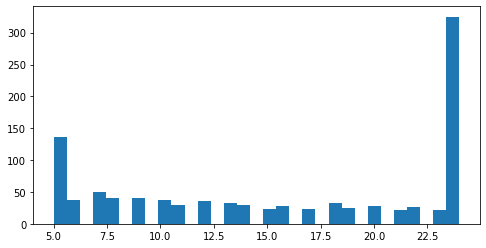

In [6]:
plt.figure(figsize=(8,4))
plt.hist(all_data_length.flatten().numpy(), bins=31);

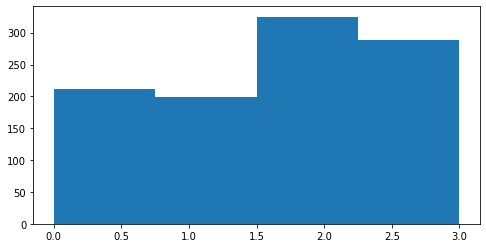

In [7]:
plt.figure(figsize=(8,4))
plt.hist(all_event.flatten().numpy(), bins=4);